# Pymaceuticals Inc.
---

### Analysis

- Between the 4 treatments that we assessed in more depth, Capomulin and Ramicane appeared to be more effective at reducing the Tumor Volume of their mice, or at least the mice treated with these treatments had smaller Tumor Volumes at the end of their treatment. These 2 treatments also had the biggest sample size which adds to the credibility of their results, especially considering there were no outliers to be found in the data, unlike treatment Infubinol (1 outlier).

- We can also see the effectiveness of the Capomulin treatment of Mouse L509 through our line plot. The Tumor Volume would steadily increase but then steeply decline before a slight increase and further decline over the Timepoints.

- It is also worth noting that the Average Tumor Volume for Capomulin treatments showed a strong correlation with the Mouse Weight (correlation of 0.84). It would be worth checking to see if Capomulin treated mice were lighter in weight than the other Drug Regimens to see if that is skewing the interpretation of the data. We have seen that it is effective, but maybe a drug like Ceftamin can be just as effective, but was only used on mice that were heavier, and therefore had larger tumors to start with. More research would need to be done.

 

In [293]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results,mouse_metadata,how="left",on=["Mouse ID"])

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [294]:
# Checking the number of mice.
len(combined_df["Mouse ID"].unique())

249

In [295]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_df[combined_df.duplicated(['Mouse ID','Timepoint'],keep=False)]
duplicates["Mouse ID"].unique()

array(['g989'], dtype=object)

In [296]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [297]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df.drop(combined_df[combined_df["Mouse ID"] == "g989"].index, inplace=True)
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [298]:
# Checking the number of mice in the clean DataFrame.
len(combined_df["Mouse ID"].unique())

248

## Summary Statistics

In [299]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen 
mean_tumor_volume = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_tumor_volume = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor_volume = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor_volume = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Rename the columns
mean_tumor_volume = mean_tumor_volume.rename("Mean Tumor Volume")
median_tumor_volume = median_tumor_volume.rename("Median Tumor Volume")
var_tumor_volume = var_tumor_volume.rename("Tumor Volume Variance")
std_tumor_volume = std_tumor_volume.rename("Tumor Volume Std. Dev.")
sem_tumor_volume = sem_tumor_volume.rename("Tumor Volume Std. Err.")


# Assemble the resulting series into a single summary DataFrame.
summary_stats1 = pd.merge(mean_tumor_volume, median_tumor_volume, how="inner", on=["Drug Regimen"])
summary_stats2 = pd.merge(summary_stats1, var_tumor_volume, how="inner", on=["Drug Regimen"])
summary_stats3 = pd.merge(summary_stats2, std_tumor_volume, how="inner", on=["Drug Regimen"])
summary_stats_df = pd.merge(summary_stats3, sem_tumor_volume, how="inner", on=["Drug Regimen"])
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [300]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# mean_tumor_volume = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
# median_tumor_volume = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
# var_tumor_volume = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
# std_tumor_volume = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
# sem_tumor_volume = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats_agg_df = combined_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(['mean','median','var','std','sem'],axis=1).style.set_caption("Tumor Volume (mm3)")
summary_stats_agg_df


## Bar and Pie Charts

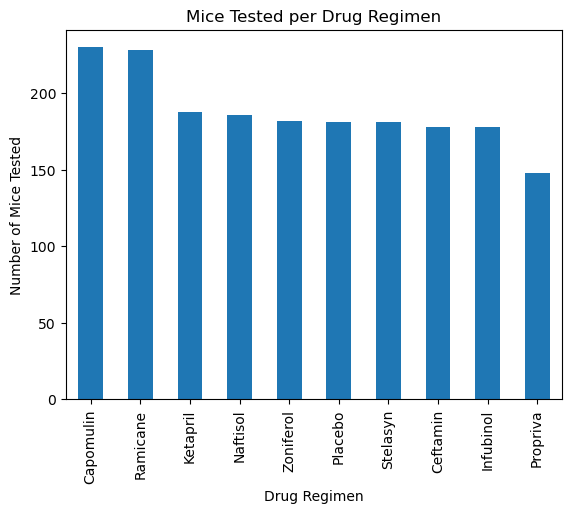

In [301]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

count_timepoint = combined_df.groupby("Drug Regimen")["Timepoint"].count()
count_timepoint = count_timepoint.sort_values(ascending=False)
count_timepoint.plot(kind="bar",ylabel="Number of Mice Tested")
plt.title("Mice Tested per Drug Regimen")
plt.show()



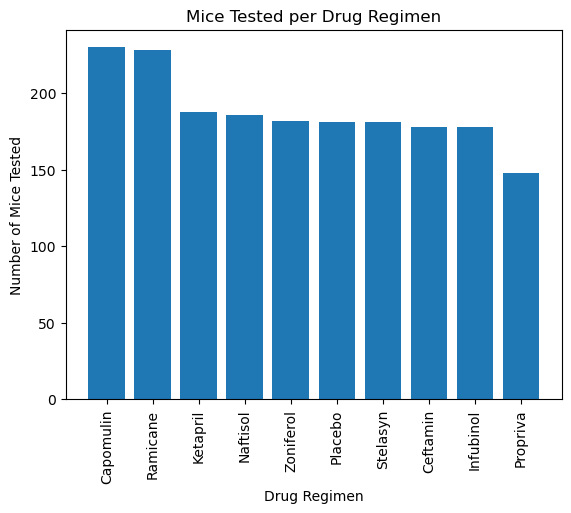

In [302]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_values = count_timepoint.index
y_values = count_timepoint
plt.bar(x_values,y_values)
plt.title("Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.show()

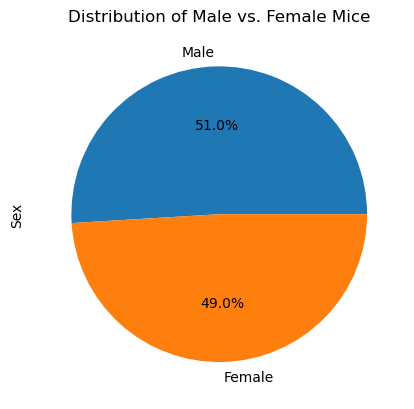

In [303]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = combined_df.groupby("Sex")["Sex"].count()
sex_count = sex_count.sort_values(ascending=False)
sex_count.plot(kind="pie",autopct="%1.1f%%")
plt.title("Distribution of Male vs. Female Mice")
plt.show()

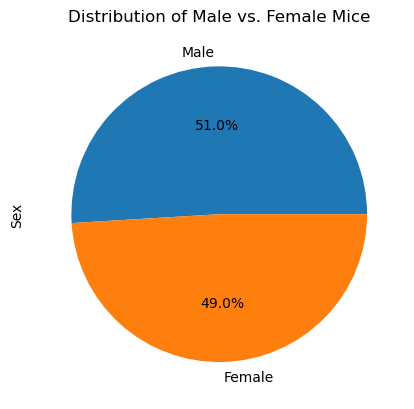

In [304]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = sex_count.index
plt.pie(sex_count,labels=labels,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Distribution of Male vs. Female Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [305]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = combined_df.groupby("Mouse ID").max()[["Timepoint"]]


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_timepoint_df = pd.merge(greatest_timepoint,combined_df,on=["Mouse ID","Timepoint"])
greatest_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [306]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_tumor = greatest_timepoint_df.loc[greatest_timepoint_df["Drug Regimen"] == treatment,:]
    
    # add subset 
    tumor_vol_data.append(drug_tumor["Tumor Volume (mm3)"])
    
    
    # Determine IQR and bounds for outliers
    quartiles = drug_tumor["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"{treatment} Statistal Analysis:")
    print(f"For {treatment}, the lower quartile of occupancy is: {lowerq}")
    print(f"For {treatment}, the upper quartile of occupancy is: {upperq}")
    print(f"For {treatment}, the interquartile range of occupancy is: {iqr}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"For {treatment}, the values below {lower_bound} could be outliers.")
    print(f"For {treatment}, the values above {upper_bound} could be outliers.")
    
    # Determine outliers using upper and lower bounds
    outlier_occupancy = drug_tumor.loc[(drug_tumor['Drug Regimen'] == treatment) & ((drug_tumor['Tumor Volume (mm3)'] < lower_bound) | (drug_tumor['Tumor Volume (mm3)'] > upper_bound)),["Tumor Volume (mm3)"]]
    print(f"Potential Outliers: {outlier_occupancy}")
    print(f"")

      
    
    


Capomulin Statistal Analysis:
For Capomulin, the lower quartile of occupancy is: 32.37735684
For Capomulin, the upper quartile of occupancy is: 40.1592203
For Capomulin, the interquartile range of occupancy is: 7.781863460000004
For Capomulin, the values below 20.70456164999999 could be outliers.
For Capomulin, the values above 51.83201549 could be outliers.
Potential Outliers: Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []

Ramicane Statistal Analysis:
For Ramicane, the lower quartile of occupancy is: 31.56046955
For Ramicane, the upper quartile of occupancy is: 40.65900627
For Ramicane, the interquartile range of occupancy is: 9.098536719999998
For Ramicane, the values below 17.912664470000003 could be outliers.
For Ramicane, the values above 54.30681135 could be outliers.
Potential Outliers: Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []

Infubinol Statistal Analysis:
For Infubinol, the lower quartile of occupancy is: 54.04860769
For Infubinol, the upper quartile o

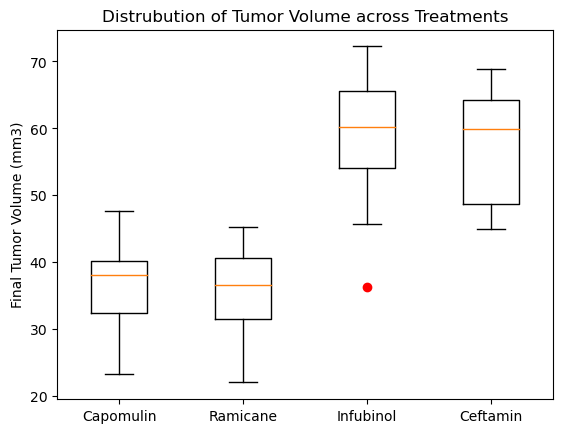

In [307]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data,labels=treatments,sym="r")
ax1.set_ylabel("Final Tumor Volume (mm3)")
plt.title("Distrubution of Tumor Volume across Treatments")
plt.show()


## Line and Scatter Plots

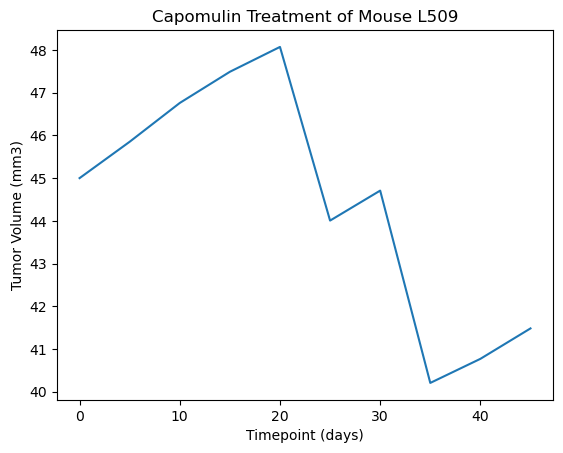

In [308]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_l509 = combined_df.loc[combined_df["Mouse ID"] == "l509",:]
x_values = mouse_l509["Timepoint"]
y_values = mouse_l509["Tumor Volume (mm3)"]
plt.plot(x_values,y_values)
plt.title("Capomulin Treatment of Mouse L509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


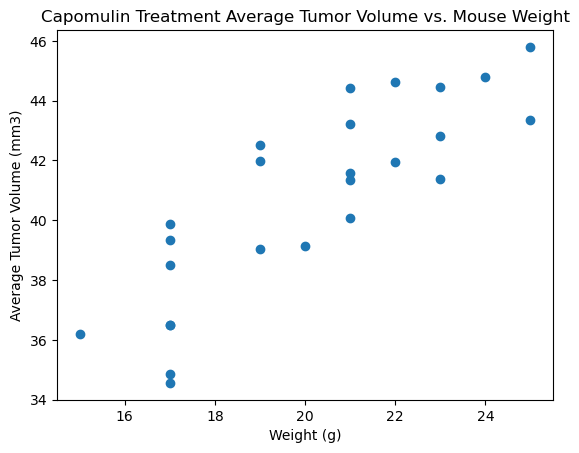

In [309]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin",:]
capomulin_average = capomulin.groupby("Mouse ID").mean()
x_values = capomulin_average["Weight (g)"]
y_values = capomulin_average["Tumor Volume (mm3)"]
plt.title("Capomulin Treatment Average Tumor Volume vs. Mouse Weight")
plt.scatter(x_values,y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


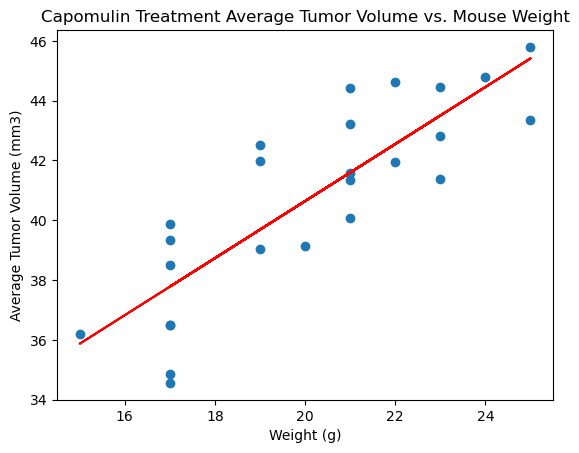

In [310]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values,y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Capomulin Treatment Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.show()
